### I need to make either a box plot or violin plot for every region that we are analyzing. Each plot should be labeled with the region and each plot should have the ECCO, ASTE, ORAS5, and GLORYS boxes or violins with correspondng colors.

import the tools I may need

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import csv
import os
import pandas as pd
from matplotlib import gridspec
import glob
import re

!pip install seaborn

In [2]:
import seaborn as sns

In [3]:
# Using xarray, load all my csv files
output_path = "Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Plots/ViolinPlots/new_plots"
os.makedirs(output_path, exist_ok=True)

In [4]:
# ECCO

# Load summary difference data and region info
#ecco_summary_path = "/Users/sherine_aldrin/Downloads/CoOL/GreenlandModel/NEW_Files_OMG_vs_ECCO"
#all_csv_paths = glob.glob(os.path.join(ecco_summary_path, "profile_summary_*.csv"))
#region_csv = "/Users/sherine_aldrin/Downloads/CoOL/GreenlandModel/OMG_CTD_Locations_2016_2017_with_region.csv"

# Combine all CSVs
ecco_csv = pd.read_csv('/Users/sherine_aldrin/Downloads/CoOL/GreenlandModel/Files_OMG_vs_ECCO/ecco_profiles_with_region.csv') #for csv in all_csv_paths]
#ecco_csv = pd.concat(e_summary_df_list, ignore_index=True)

In [5]:
ecco_csv = ecco_csv.rename(columns={"variable": "Var_type"})

In [6]:
ecco_csv

,file,Var_type,latitude,longitude,ecco_mean,omg_mean,difference,ecco_profile,depth_profile,omg_profile,omg_depth,file_clean,Region
0,CTD_20160916_140334.nc,THETA,74.732773,-65.246246,0.457267,1.256591,0.799324,"[6.908427715301514, 6.9216132164001465, 3.3188...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[3.883240222930908, 3.85650897026062, 3.849779...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160916_140334,NW
1,CTD_20160928_154417.nc,THETA,75.957336,-59.610691,1.542009,1.341167,-0.200843,"[2.7182743549346924, 2.717210292816162, 2.4996...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0]","[-0.32447493076324463, -0.3700553774833679, -0...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160928_154417,NW
2,CTD_20160923_153439.nc,THETA,81.222504,-64.780159,-0.851680,-0.294011,0.557669,"[-1.8896114826202393, -1.8808256387710571, -1....","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[-1.5689005851745605, -1.5877989530563354, -1....","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160923_153439,N
3,CTD_20160914_145226.nc,THETA,69.198280,-52.412819,1.602942,2.162872,0.559930,"[5.706634998321533, 5.755438804626465, 4.86297...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[5.613218784332275, 5.597585678100586, 5.57973...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160914_145226,CW
4,CTD_20160924_155359.nc,THETA,73.738861,-61.269279,0.488545,1.404973,0.916428,"[8.536798477172852, 8.525147438049316, 3.73222...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[3.9821274280548096, 3.950950860977173, 3.9497...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160924_155359,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,CTD_20160923_145953.nc,SALT,81.595177,-64.833717,33.289436,34.247948,0.958511,"[30.770662307739258, 30.798933029174805, 31.42...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[28.668127059936523, 29.054046630859375, 29.51...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160923_145953,N
2589,CTD_20160915_155110.nc,SALT,70.899162,-52.730759,33.637035,34.108215,0.471180,"[32.13929748535156, 32.14506530761719, 32.4169...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[31.12490463256836, 31.138601303100586, 31.339...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160915_155110,CW
2590,CTD_20160920_113720.nc,SALT,75.972420,-12.271639,33.287636,34.010475,0.722839,"[31.531347274780273, 31.557451248168945, 32.29...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[28.721389770507812, 29.012189865112305, 29.05...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160920_113720,NE
2591,CTD_20160929_145212.nc,SALT,72.145752,-18.418970,33.823360,34.497578,0.674217,"[32.12173080444336, 32.13656234741211, 32.5918...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[32.56867599487305, 32.886619567871094, 33.066...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....",20160929_145212,NE


In [7]:
# ASTE
aste_csv = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/ASTE_Greenland_Model/full_profiles_with_region.csv")

In [8]:
#aste_csv

In [9]:
# ORAS5
oras5_salt_csv = "/Users/sherine_aldrin/Downloads/CoOL/ORAS5/Salt_ORAS5_Profiles.csv"
oras5_temp_csv = "/Users/sherine_aldrin/Downloads/CoOL/ORAS5/Temp_ORAS5_Profiles.csv"

oras5_paths = [oras5_salt_csv, oras5_temp_csv]

# Combine all CSVs
o_summary_df_list = [pd.read_csv(csv) for csv in oras5_paths]
oras5_csv = pd.concat(o_summary_df_list, ignore_index=True)

In [10]:
#oras5_csv

In [11]:
# GLORYS

glorys_salt_data = "/Users/sherine_aldrin/Downloads/CoOL/GLORYS/Salt_GLORYS_Profiles.csv"
glorys_temp_data = "/Users/sherine_aldrin/Downloads/CoOL/GLORYS/Temp_GLORYS_Profiles.csv"

glorys_paths = [glorys_salt_data, glorys_temp_data]
g_summary_df_list = [pd.read_csv(csv) for csv in glorys_paths]
glorys_csv = pd.concat(g_summary_df_list, ignore_index=True)

In [12]:
#glorys_csv

In [13]:
# EN4

en4_salt_data = "/Users/sherine_aldrin/Downloads/CoOL/EN4/Salt_EN4_Profiles.csv"
en4_temp_data = "/Users/sherine_aldrin/Downloads/CoOL/EN4/Temp_EN4_Profiles.csv"

en4_paths = [en4_salt_data, en4_temp_data]
en4_summary_df_list = [pd.read_csv(csv) for csv in en4_paths]
en4_csv = pd.concat(en4_summary_df_list, ignore_index=True)

In [14]:
en4_csv

,CTD_file,Var_type,EN4 lon(X),EN4 lat(Y),OMG lon(X),OMG lat(Y),Distance,Year,Month,depth_profile,omg_depth,Profile
0,CTD_20160916_140334.nc,Salinity,-65.0,75.0,-65.246246,74.732773,30.561722,2016,9,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[32.4778938293457, 32.805458068847656, 33.2643..."
1,CTD_20160928_154417.nc,Salinity,-60.0,76.0,-59.610691,75.957336,11.511223,2016,9,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[31.99327850341797, 32.80410385131836, 33.2989..."
2,CTD_20160923_153439.nc,Salinity,-65.0,81.0,-64.780159,81.222504,25.028279,2016,9,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[30.498441696166992, 32.02467346191406, 32.296..."
3,CTD_20160914_145226.nc,Salinity,-52.0,69.0,-52.412819,69.198280,27.464093,2016,9,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[31.854320526123047, 32.4426383972168, 32.9145..."
4,CTD_20160924_155359.nc,Salinity,-61.0,74.0,-61.269279,73.738861,30.205294,2016,9,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[31.965415954589844, 32.733707427978516, 33.27..."
...,...,...,...,...,...,...,...,...,...,...,...,...
789,CTD_20161001_134519.nc,Theta,-38.0,65.0,-38.312889,65.242393,30.670317,2016,10,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[2.5319409370422363, 3.1124379634857178, 3.962..."
790,CTD_20161006_150939.nc,Theta,-30.0,66.0,-30.450939,65.656540,43.360270,2016,10,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[5.704433441162109, 5.892323970794678, 6.36643..."
791,CTD_20161001_133916.nc,Theta,-39.0,65.0,-38.649700,64.566750,50.953430,2016,10,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[2.051377773284912, 2.6777114868164062, 3.5972..."
792,CTD_20161001_143840.nc,Theta,-40.0,63.0,-40.269360,63.165260,22.837379,2016,10,"[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[5.49020528793335, 5.837212562561035, 6.253257..."


#### Important variables!

ECCO = ecco mean, omg mean
ASTE = ??
ORAS5 = ??
GLORYS = ??


Now I realize I may have not trimmed all the nan's or 0's. I think ecco is good, but double check the other three..
OK all three have the profiles, I think the mean would just be using the mean function but MAKING sure to remove the nan or 0 values...

In [15]:
#df = pd.DataFrame({'Name': ['Alice', 'Bob'], 'Age': [25, 30]})
en4_headers = pd.DataFrame({'en4': en4_csv.columns.tolist()})
ecco_headers = pd.DataFrame({'ecco': ecco_csv.columns.tolist()})
aste_headers = pd.DataFrame({'aste': aste_csv.columns.tolist()})
oras5_headers = pd.DataFrame({'oras5':oras5_csv.columns.tolist()})
glorys_headers = pd.DataFrame({'glorys':glorys_csv.columns.tolist()})

In [16]:
all_headers = pd.concat([en4_headers, ecco_headers, aste_headers, oras5_headers, glorys_headers], axis=1)
display(all_headers) 

,en4,ecco,aste,oras5,glorys
0,CTD_file,file,CTD_file,CTD_file,CTD_file
1,Var_type,Var_type,Year,Var_type,Var_type
2,EN4 lon(X),latitude,Month,ORAS5 lon(X),GLORYS lon(X)
3,EN4 lat(Y),longitude,ASTE_tile,ORAS5 lat(Y),GLORYS lat(Y)
4,OMG lon(X),ecco_mean,ASTE_lat,OMG lon(X),OMG lon(X)
5,OMG lat(Y),omg_mean,Distance,OMG lat(Y),OMG lat(Y)
6,Distance,difference,ASTE_lon,Distance,Distance
7,Year,ecco_profile,Var_type,Year,Year
8,Month,depth_profile,depth_profile_x,Month,Month
9,depth_profile,omg_profile,omg_depth_x,depth_profile,depth_profile


In [22]:
# OMG Over here I need to make sure I get all the OMG profiles!

def get_all_nc_files(folder):
    nc_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".nc"):
                nc_files.append(os.path.join(root, file))
                #nc_files.append(file)
    return nc_files


#omg_csv = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/ORAS5/OMG_CTD_Locations_2016_2017_with_region.csv") Originally have this, 
#but I don't want to ruin it so I might just make a new csv or dataframe just with the profile stuff
#so that I can access just that when finding the differences with all the other models




## THIS LOOP!! want to make a function so that I can easily make a dataframe for each model
## the output should be a csv with the profiles, the region, the data, and the mean differences

omg_paths = get_all_nc_files("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/OMG_data")
omg_locs = get_all_nc_files("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/OMG_CTD_Locations_2016_2017_with_region")

In [23]:
#def clean_profile(profile_string):
   # if pd.isna(profile_string):
      # return []
    #nums = re.findall(r'[-+]?[\d]*\.?[\d]+', profile_string)
   # return [float(x) for x in nums if float(x) != 0.0]

# this is a function to clean up the file

def clean_profile(profile_data):
    if profile_data is None:
        return []
    if isinstance(profile_data, (list, np.ndarray)):
        return [float(x) for x in profile_data if float(x) != 0.0 and not np.isnan(x)]
    if isinstance(profile_data, str):
        nums = re.findall(r'[-+]?\d*\.\d+|\d+', profile_data)
        return [float(x) for x in nums if float(x) != 0.0]
    return []


def read_ctd_profile(path, var_type):
    try:
        ds = xr.open_dataset(path)
        if var_type == "Theta":
            values = ds["potential_temperature"].values
        elif var_type == "Salinity":
            values = ds["practical_salinity"].values
        else:
            return None, None
        depths = ds["depth"].values
        ds.close()
        return depths, values
    except Exception as e:
        print(f"Failed reading CTD file {path}: {e}")
        return None, None



In [34]:
pd.read_csv(
        "/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/OMG_CTD_Locations_2016_2017_with_region.csv"
    )

,File_ID,Type,Year,Month,Day,Hour,Minute,Second,Longitude,Latitude,Region
0,20160707_213510,CTDs,2016,7,7,21,35,10,-66.973570,73.902115,NW
1,20160709_034633,CTDs,2016,7,9,3,46,33,-68.658730,75.207280,NW
2,20160709_082456,CTDs,2016,7,9,8,24,56,-69.085870,75.420880,NW
3,20160709_125524,CTDs,2016,7,9,12,55,24,-69.704834,75.644600,NW
4,20160711_235711,CTDs,2016,7,11,23,57,11,-69.625770,77.477295,NW
...,...,...,...,...,...,...,...,...,...,...,...
733,20171023_171507,AXCTDs,2017,10,23,17,15,7,-55.614020,68.373570,CW
734,20171023_172546,AXCTDs,2017,10,23,17,25,46,-57.237530,68.791400,CW
735,20171023_173533,AXCTDs,2017,10,23,17,35,33,-57.154720,68.244800,CW
736,20171023_174710,AXCTDs,2017,10,23,17,47,10,-58.607600,67.746220,CW


In [35]:
def findDiffs(model_csv, output_name, var_type_name, is_ecco=False, is_aste=False, is_en4 = False):

    # get OMG netCDF paths
    omg_paths = get_all_nc_files("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/OMG_data")
    region_info = pd.read_csv(
        "/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/OMG_CTD_Locations_2016_2017_with_region.csv"
    )

    # work on a copy
    df = model_csv.copy()

    # Detect CTD_file column
    possible_ctd_cols = ["CTD_file", "file", "File_ID"]
    for col in possible_ctd_cols:
        if col in df.columns:
            df["CTD_file"] = df[col]
            break
    if "CTD_file" not in df.columns:
        raise ValueError("Could not find CTD file column in input CSV")

    # Derive File_ID
    df["File_ID"] = (
        df["CTD_file"]
        .astype(str)
        .str.replace("CTD_", "", regex=False)
        .str.replace(".nc", "", regex=False)
    )

    # Merge region info if missing
    if "Region" not in df.columns:
        df = df.merge(region_info[["File_ID", "Region"]], on="File_ID", how="left")
    df["Region"] = df["Region"].fillna("Unassigned")

    # -----------------------------
    # Determine profile column ONCE
    # -----------------------------
    if is_ecco:
        if var_type_name.lower() in ["theta", "temperature"]:
            if "ecco_profile_temp" in df.columns:
                profile_col = "ecco_profile_temp"
            elif "ecco_profile" in df.columns:
                profile_col = "ecco_profile"
            else:
                profile_col = None
        else:  # salinity
            if "ecco_profile_salt" in df.columns:
                profile_col = "ecco_profile_salt"
            elif "ecco_profile" in df.columns:
                profile_col = "ecco_profile"
            else:
                profile_col = None
    else:
        # ASTE, ORAS5, GLORYS all use "Profile"
        profile_col = "Profile" if "Profile" in df.columns else None

    if profile_col is None:
        raise ValueError("No appropriate profile column found in the CSV.")



    # -----------------------------
    # Iterate over rows
    # -----------------------------
    summary_rows = []
    for _, row in df.iterrows():
        # Determine variable type
        if "Var_type" in df.columns:
            var_type = row["Var_type"] if pd.notna(row["Var_type"]) else var_type_name
        elif "Variable" in df.columns:
            var_type = row["Variable"] if pd.notna(row["Variable"]) else var_type_name
        else:
            var_type = var_type_name

        if str(var_type).upper() in ["THETA", "TEMPERATURE"]:
            normalized_type = "Theta"
        elif str(var_type).upper() in ["SALT", "SALINITY"]:
            normalized_type = "Salinity"
        else:
            print(f"Skipping unknown Var_type: {var_type}")
            continue

        # Clean the profile data
        profile = clean_profile(row[profile_col])
        if len(profile) == 0:
            continue

        #if is_en4:
          #  if 
          #  profile = profile.apply(kelvin_to_celsius)

        # Find matching CTD file
        ############################ editing right here new
        #ctd_file = row["CTD_file"]
        if is_ecco:
            #ctd_file = row["CTD_file"]
            ctd_file = row["file"]

        
        region = row["Region"]
        match_path = [p for p in omg_paths if ctd_file in os.path.basename(p)]
        if not match_path:
            print("NO MATCH:", ctd_file)
            continue
        ctd_path = match_path[0]

        # Read CTD profile
        ctd_depths, ctd_values = read_ctd_profile(ctd_path, normalized_type)
        if ctd_values is None or len(ctd_values) == 0 or ctd_depths is None or len(ctd_depths) == 0:
            continue

        # Interpolate to common depths
        interp_len = min(len(profile), len(ctd_values))
        common_depths = np.linspace(ctd_depths.min(), ctd_depths.max(), interp_len)
        
        ctd_interp = np.interp(common_depths, ctd_depths, ctd_values)
        model_interp = np.interp(
            common_depths,
            np.linspace(ctd_depths.min(), ctd_depths.max(), len(profile)),
            profile
        )

        # MOST IMPORTAN""T PART
        diff = model_interp - ctd_interp
        mean_diff = np.nanmean(diff)

        if is_aste:
            summary_rows.append({
            "CTD_file": ctd_file,
            "File_ID": row["File_ID"],
            "Var_type": normalized_type,
            "Region": region,
            "OMG_Mean": float(np.nanmean(ctd_interp)),
            "Model_Mean": float(np.nanmean(model_interp)),
            "Difference": float(mean_diff),
            "Model_Profile": profile,
            "depth_profile": clean_profile(row.get("depth_profile_x", [])),
            "omg_depth": clean_profile(row.get("omg_depth_x", [])),
            "Profile_Diff": diff.tolist()
        })
        
        
        else:
            summary_rows.append({
            "CTD_file": ctd_file,
            "File_ID": row["File_ID"],
            "Var_type": normalized_type,
            "Region": region,
            "OMG_Mean": float(np.nanmean(ctd_interp)),
            "Model_Mean": float(np.nanmean(model_interp)),
            "Difference": float(mean_diff),
            "Model_Profile": profile,
            "depth_profile": clean_profile(row.get("depth_profile", [])),
            "omg_depth": clean_profile(row.get("omg_depth", [])),
            "Profile_Diff": diff.tolist()
        })


    output_sum_folder = "Violin/"
    os.makedirs(output_sum_folder, exist_ok=True)  # make sure folder exists

    temp_output_name = os.path.join(output_sum_folder, output_name)

    # Save output
    summary_df = pd.DataFrame(summary_rows)
    summary_df.to_csv(temp_output_name, index=False)
    print(f"Saved summary to: {temp_output_name}")


In [32]:
for path in omg_paths:
    print(os.path.basename(path))
print(ecco_temp["CTD_file"].unique()[:10])



KeyError: 'CTD_file'

In [36]:
ecco_temp = ecco_csv[ecco_csv["Var_type"].str.upper() == "THETA"]
ecco_salt = ecco_csv[ecco_csv["Var_type"].str.upper() == "SALT"]

findDiffs(ecco_temp, "violin_ECCO_temp.csv", var_type_name="Theta", is_ecco=True, is_aste=False)
findDiffs(ecco_salt, "violin_ECCO_salt.csv", var_type_name="Salinity", is_ecco=True, is_aste=False)

NO MATCH: CTD_20160916_140334.nc
NO MATCH: CTD_20160928_154417.nc
NO MATCH: CTD_20160923_153439.nc
NO MATCH: CTD_20160914_145226.nc
NO MATCH: CTD_20160924_155359.nc
NO MATCH: CTD_20160928_133513.nc
NO MATCH: CTD_20160928_130838.nc
NO MATCH: CTD_20160914_113251.nc
NO MATCH: CTD_20160913_154431.nc
NO MATCH: CTD_20160928_131853.nc
NO MATCH: CTD_20160929_145648.nc
NO MATCH: CTD_20160924_163708.nc
NO MATCH: CTD_20160929_150010.nc
NO MATCH: CTD_20160924_161112.nc
NO MATCH: CTD_20160919_105644.nc
NO MATCH: CTD_20160916_152547.nc
NO MATCH: CTD_20160924_184444.nc
NO MATCH: CTD_20160924_164636.nc
NO MATCH: CTD_20160914_140842.nc
NO MATCH: CTD_20160919_103843.nc
NO MATCH: CTD_20160923_152417.nc
NO MATCH: CTD_20160913_152643.nc
NO MATCH: CTD_20160924_180521.nc
NO MATCH: CTD_20160929_141211.nc
NO MATCH: CTD_20160924_160742.nc
NO MATCH: CTD_20160921_112603.nc
NO MATCH: CTD_20160914_121319.nc
NO MATCH: CTD_20160916_123311.nc
NO MATCH: CTD_20160921_112128.nc
NO MATCH: CTD_20160928_154917.nc
NO MATCH: 

In [31]:
#aste_temp = aste_csv[aste_csv["Var_type"].str.upper() == "THETA"]
#aste_salt = aste_df[aste_csv["Var_type"].str.upper() == "SALT"]
# ValueError: No appropriate profile column found in the CSV.

aste_temp = aste_csv[aste_csv["Var_type"].str.upper() == "THETA"]
aste_salt = aste_csv[aste_csv["Var_type"].str.upper() == "SALT"]

findDiffs(aste_temp, "violin_summary_ASTE_temp.csv", var_type_name="Theta", is_ecco=False, is_aste=True)
findDiffs(aste_salt, "violin_summary_ASTE_salt.csv", var_type_name="Salinity", is_ecco=False, is_aste=True)


Saved summary to: Violin/violin_summary_ASTE_temp.csv
Saved summary to: Violin/violin_summary_ASTE_salt.csv


In [32]:
oras5_temp = oras5_csv[oras5_csv["Var_type"].str.upper() == "THETA"]
oras5_salt = oras5_csv[oras5_csv["Var_type"].str.upper() == "SALINITY"]

findDiffs(oras5_temp, "violin_ORAS5_temp.csv", var_type_name="Theta")
findDiffs(oras5_salt, "violin_ORAS5_salt.csv", var_type_name="Salinity")

Saved summary to: Violin/violin_ORAS5_temp.csv
Saved summary to: Violin/violin_ORAS5_salt.csv


In [33]:
glorys_temp = glorys_csv[glorys_csv["Var_type"].str.upper() == "THETA"]
glorys_salt = glorys_csv[glorys_csv["Var_type"].str.upper() == "SALINITY"]

findDiffs(glorys_temp, "violin_GLORYS_temp.csv", var_type_name="Theta")
findDiffs(glorys_salt, "violin_GLORYS_salt.csv", var_type_name="Salinity")

Saved summary to: Violin/violin_GLORYS_temp.csv
Saved summary to: Violin/violin_GLORYS_salt.csv


In [108]:
en4_temp = en4_csv[en4_csv["Var_type"].str.upper() == "THETA"]
en4_salt = en4_csv[en4_csv["Var_type"].str.upper() == "SALINITY"]

findDiffs(en4_temp, "violin_EN4_temp.csv", var_type_name="Theta", is_en4=True)
findDiffs(en4_salt, "violin_EN4_salt.csv", var_type_name="Salinity", is_en4=True)

Saved summary to: Violin/violin_EN4_temp.csv
Saved summary to: Violin/violin_EN4_salt.csv


### Violin Plots!

In [176]:
import ast

def kelvin_to_celsius(cell):
    # If it's a string that looks like a list, parse it
    if isinstance(cell, str):
        cell = ast.literal_eval(cell)
    # If it's not a list, just return as is
    if not isinstance(cell, (list, tuple)):
        return cell
    # Convert each value
    return [float(k) - 273.15 for k in cell]

In [177]:
# Read each model's summary
ecco_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_ECCO_temp.csv")
aste_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_summary_ASTE_temp.csv")
oras5_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_ORAS5_temp.csv")
glorys_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_GLORYS_temp.csv")
en4_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_EN4_temp.csv")

# Add model column
ecco_df["Model"] = "ECCO"
aste_df["Model"] = "ASTE"
oras5_df["Model"] = "ORAS5"
glorys_df["Model"] = "GLORYS"
en4_df["Model"] = "EN4"

#en4_df['Model_Profile'] = en4_df['Model_Profile'].apply(kelvin_to_celsius)
#en4_df['Difference'] =

# Combine
combined_df = pd.concat([ecco_df, aste_df, oras5_df, glorys_df, en4_df], ignore_index=True)

### Change the temp profiles all from kelvin to celsius

In [178]:
combined_df

,CTD_file,File_ID,Var_type,Region,OMG_Mean,Model_Mean,Difference,Model_Profile,depth_profile,omg_depth,Profile_Diff,Model
0,CTD_20160916_140334.nc,20160916_140334,Theta,NW,1.274545,0.457267,-0.817277,"[6.908427715301514, 6.9216132164001465, 3.3188...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....","[3.0251874923706055, 6.187554178237915, 4.3038...",ECCO
1,CTD_20160928_154417.nc,20160928_154417,Theta,NW,1.223913,1.542009,0.318096,"[2.7182743549346924, 2.717210292816162, 2.4996...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0]","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....","[3.042749285697937, 2.6320635333657267, 1.1586...",ECCO
2,CTD_20160923_153439.nc,20160923_153439,Theta,N,-0.302344,-0.851680,-0.549336,"[-1.8896114826202393, -1.8808256387710571, -1....","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....","[-0.3207108974456787, -0.3106125593185425, -0....",ECCO
3,CTD_20160914_145226.nc,20160914_145226,Theta,CW,2.252522,1.602943,-0.649579,"[5.706634998321533, 5.755438804626465, 4.86297...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....","[0.09341621398925781, 0.7830150127410889, 3.17...",ECCO
4,CTD_20160924_155359.nc,20160924_155359,Theta,NW,1.535566,0.488545,-1.047021,"[8.536798477172852, 8.525147438049316, 3.73222...","[5.0, 15.0, 25.0, 35.0, 45.0, 55.0, 65.0, 75.0...","[-1.0, -2.0, -3.0, -4.0, -5.0, -6.0, -7.0, -8....","[4.554671049118042, 4.679322957992554, 5.31249...",ECCO
...,...,...,...,...,...,...,...,...,...,...,...,...
3355,CTD_20161001_134519.nc,20161001_134519,Theta,SE,4.225990,5.055859,0.829869,"[2.5319409370422363, 3.1124379634857178, 3.962...","[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[-2.359060764312744, -1.734792172908783, -1.91...",EN4
3356,CTD_20161006_150939.nc,20161006_150939,Theta,CE,4.754643,5.182232,0.427589,"[5.704433441162109, 5.892323970794678, 6.36643...","[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[-0.9554338455200195, -0.5955688285827634, 0.1...",EN4
3357,CTD_20161001_133916.nc,20161001_133916,Theta,SE,4.141115,5.197601,1.056486,"[2.051377773284912, 2.6777114868164062, 3.5972...","[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[-2.505183219909668, -2.026696536851966, -1.62...",EN4
3358,CTD_20161001_143840.nc,20161001_143840,Theta,SE,5.637334,5.339808,-0.297526,"[5.49020528793335, 5.837212562561035, 6.253257...","[5.021589756011963, 15.078539848327637, 25.160...","[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, ...","[-1.7329888343811035, -1.369482615898395, -0.9...",EN4


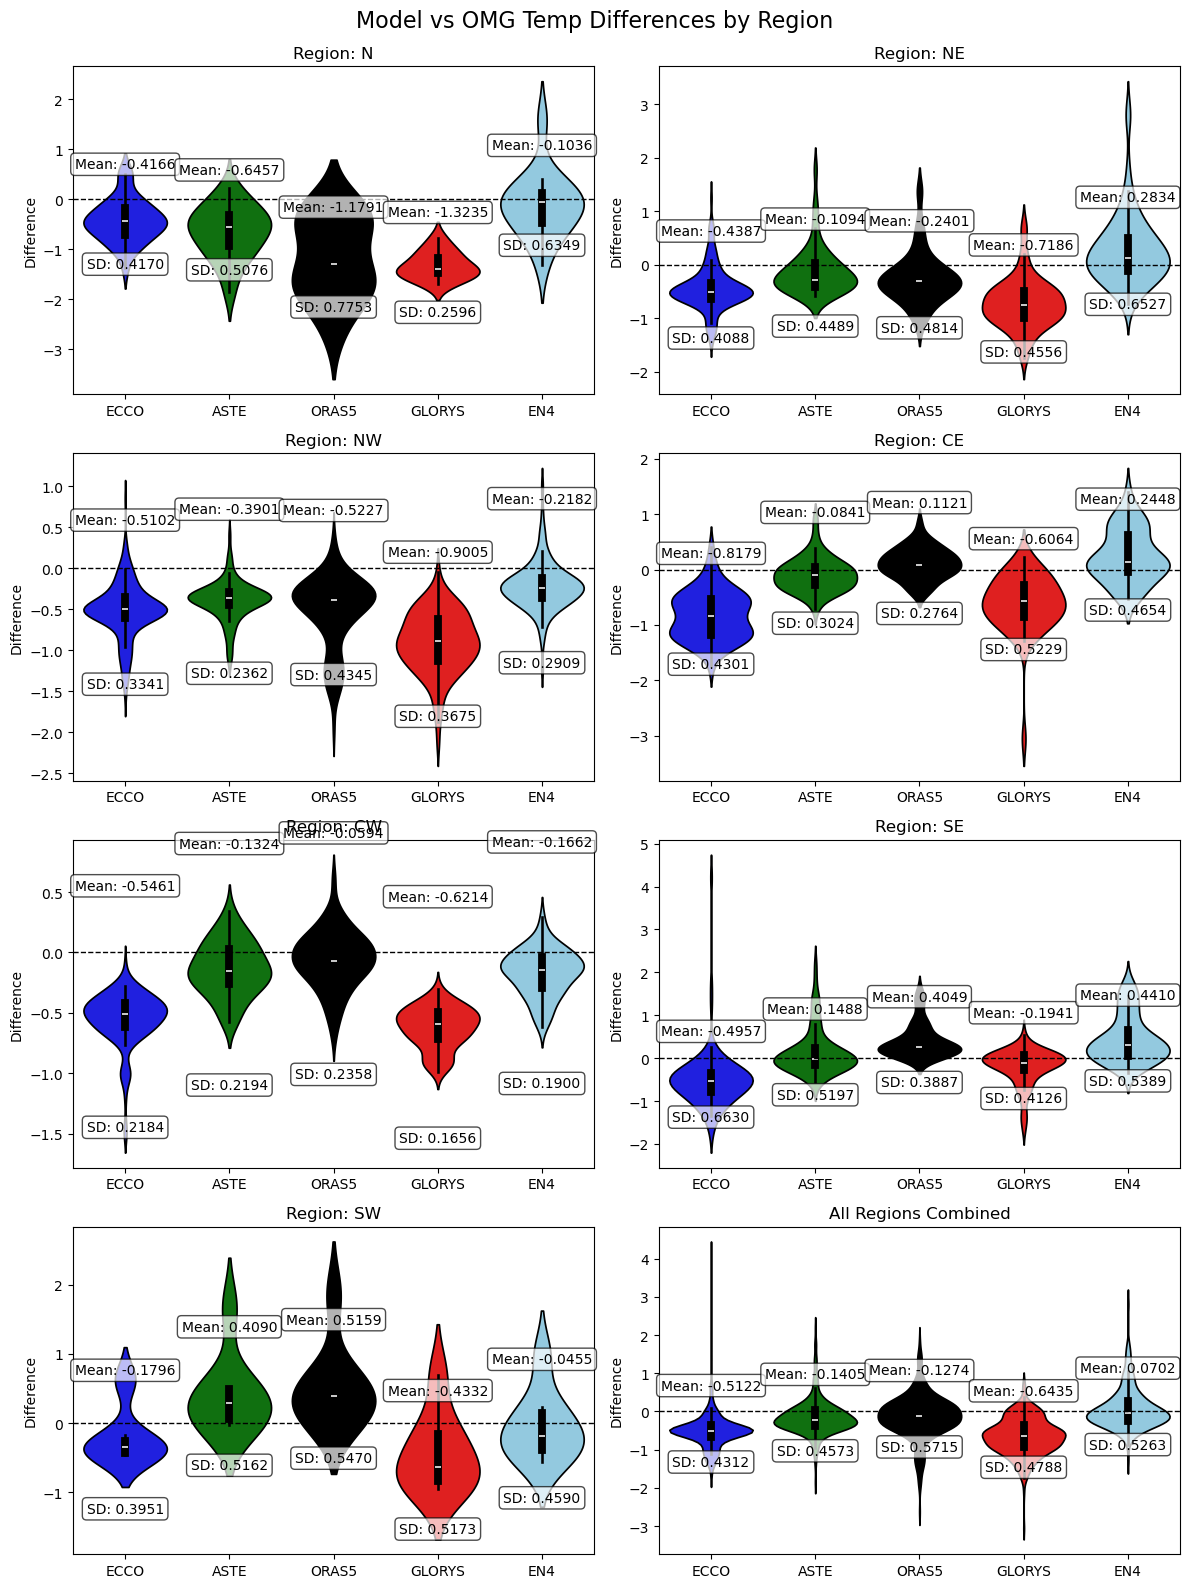

In [183]:
# Set up region layout
region_positions = {
    "N": (0, 0), "NW": (1, 0), "CW": (2, 0), "SW": (3, 0),
    "NE": (0, 1), "CE": (1, 1), "SE": (2, 1)
}
Models = ["ECCO", "ASTE", "ORAS5", "GLORYS", "EN4"]
fig = plt.figure(figsize=(12, 16))
gs = gridspec.GridSpec(4, 2, figure=fig)
# 4 rows, 2 cols

# Loop through each region
for region, (row, col) in region_positions.items():
    ax = fig.add_subplot(gs[row, col])
    
    palette = {
    "ECCO": "blue",
    "ORAS5": "black",
    "ASTE": "green",
    "GLORYS": "red",
    "EN4": "skyblue",
    }
    
    sns.violinplot(
        data=combined_df[combined_df["Region"] == region],
        x="Model",
        y="Difference",
        ax=ax,
        hue="Model",
        palette=palette,
        #median_B = combined_df[combined_df['Model'] == 'ECCO']['Difference'].median()
        #.text(x="Model", y=median_B + 0.1, s="Label for B", horizontalalignment='center', size='small', color='black', weight='semibold')
    )
    for model in Models:
        filtered_df = combined_df[combined_df['Model'] == model]
        filtered_df = filtered_df[filtered_df["Region"] == region]
        plt.text(
            Models.index(model),
            filtered_df["Difference"].median() + 1,
            f"Mean: {np.mean(filtered_df['Difference']):.4f}",
            ha="center",
            va="bottom",
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3"))
        plt.text(
            Models.index(model),
            filtered_df["Difference"].median() - 1,
            f"SD: {np.std(filtered_df['Difference']):.4f}",
            ha="center",
            va="bottom",
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3")
            )
        
    ax.set_title(f"Region: {region}")
    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_xlabel("")
    #ax.set_xticklabels(["g", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    ax.set_ylabel("Difference")


ax_all = fig.add_subplot(gs[3, 1])  # bottom-right cell
sns.violinplot(
    data=combined_df,      # <- no region filtering
    x="Model",
    y="Difference",
    hue="Model",
    palette=palette,
    ax=ax_all
)

for model in Models:
    filtered_df = combined_df[combined_df['Model'] == model]  # no Region filter
    ax_all.text(
        Models.index(model),
        filtered_df["Difference"].median() + 1,
        f"Mean: {np.mean(filtered_df['Difference']):.4f}",
        ha="center", va="bottom",
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3")
    )
    ax_all.text(
        Models.index(model),
        filtered_df["Difference"].median() - 1,
        f"SD: {np.std(filtered_df['Difference']):.4f}",
        ha="center", va="bottom",
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3")
    )

ax_all.set_title("All Regions Combined")
ax_all.axhline(0, color="black", linestyle="--", linewidth=1)
ax_all.set_xlabel("")
ax_all.set_ylabel("Difference")

plt.tight_layout()
plt.suptitle("Model vs OMG Temp Differences by Region", fontsize=16, y=0.99)
plt.tight_layout()
plt.show()
plt.savefig("Labeled_Violin_Temp_by_region.png", dpi=300)
plt.close()

### Now for Salinity

In [181]:
# Read each model's summary
ecco_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_ECCO_salt.csv")
aste_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_summary_ASTE_salt.csv")
oras5_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_ORAS5_salt.csv")
glorys_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_GLORYS_salt.csv")
en4_df = pd.read_csv("/Users/sherine_aldrin/Downloads/CoOL/Comparing_Models/Violin/violin_EN4_salt.csv")

# Add model column
ecco_df["Model"] = "ECCO"
aste_df["Model"] = "ASTE"
oras5_df["Model"] = "ORAS5"
glorys_df["Model"] = "GLORYS"
en4_df["Model"] = "EN4"

# Combine
combined_df = pd.concat([ecco_df, aste_df, oras5_df, glorys_df, en4_df], ignore_index=True)

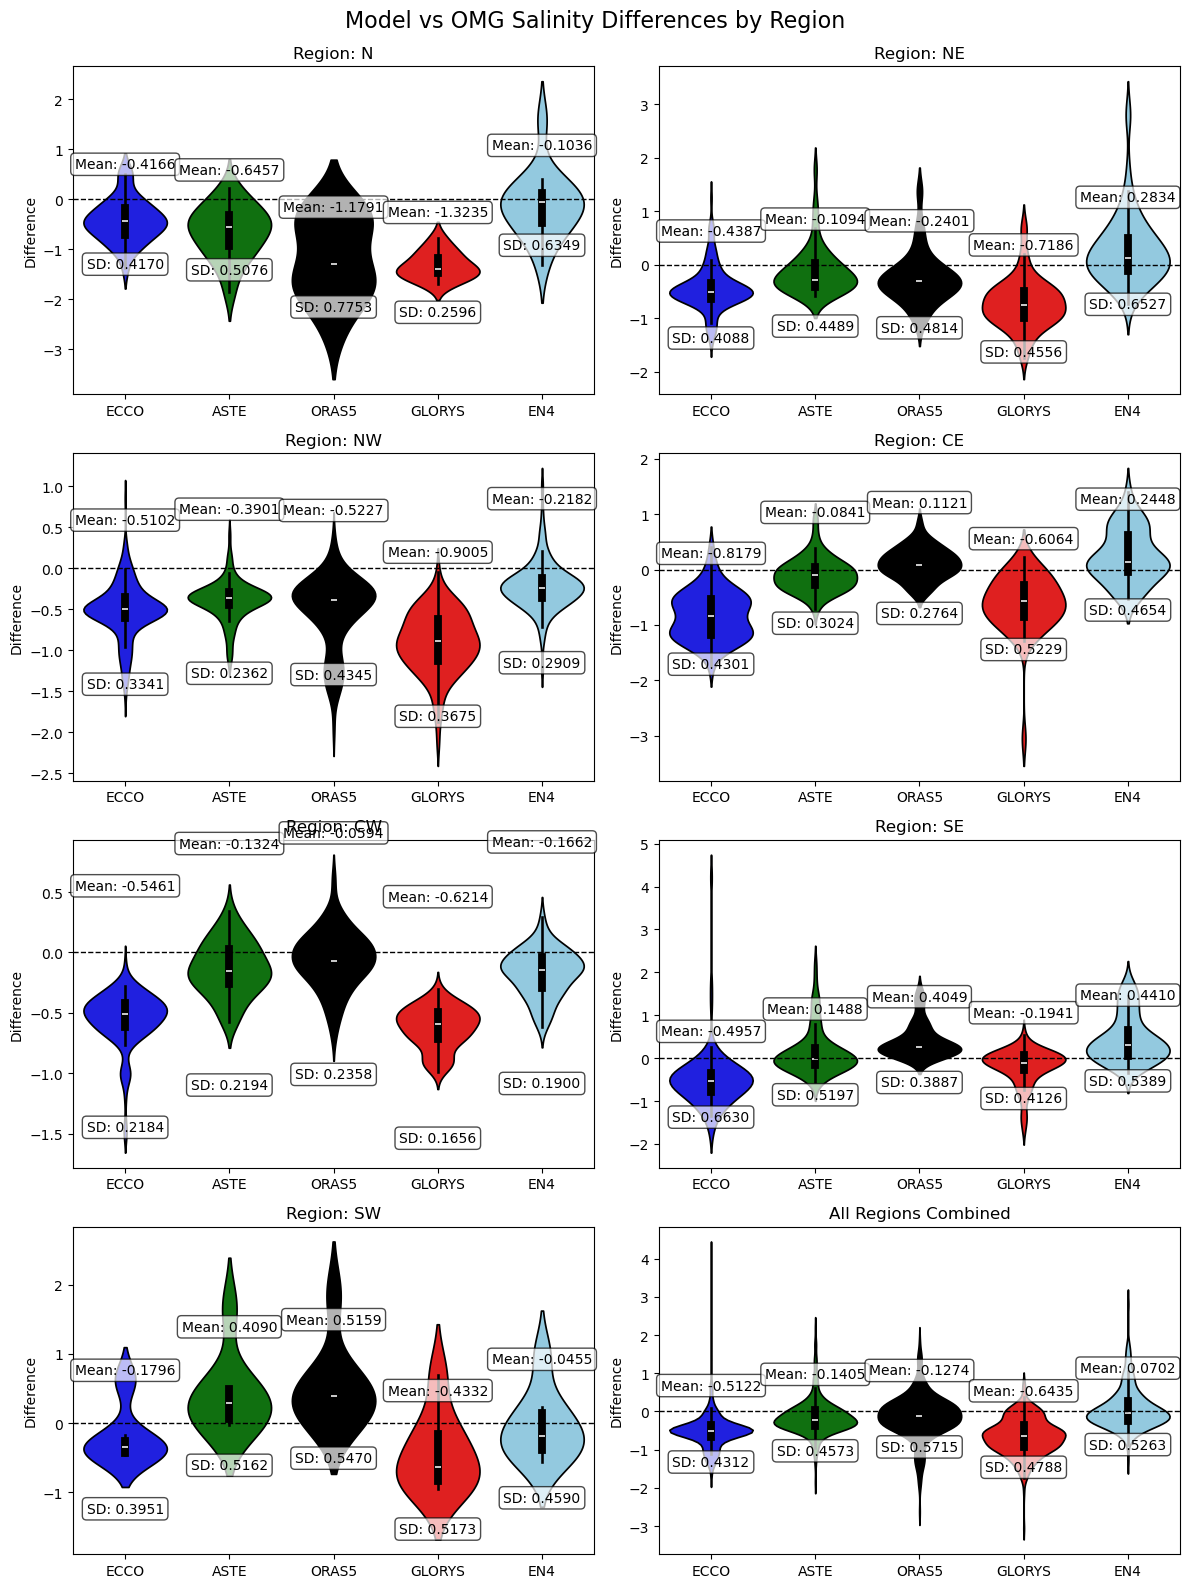

In [182]:
# Set up region layout
region_positions = {
    "N": (0, 0), "NW": (1, 0), "CW": (2, 0), "SW": (3, 0),
    "NE": (0, 1), "CE": (1, 1), "SE": (2, 1), "ALL": (3, 1)
}

fig = plt.figure(figsize=(12, 16))
gs = gridspec.GridSpec(4, 2, figure=fig)
# 4 rows, 2 cols

# Loop through each region
for region, (row, col) in region_positions.items():
    if region == "ALL":  # skip here, we'll do it separately
        continue
        
    ax = fig.add_subplot(gs[row, col])
    
    palette = {
    "ECCO": "blue",
    "ORAS5": "black",
    "ASTE": "green",
    "GLORYS": "red",
    "EN4": "skyblue"
    }
    
    sns.violinplot(
        data=combined_df[combined_df["Region"] == region],
        x="Model",
        y="Difference",
        ax=ax,
        hue="Model",
        palette=palette,
    )

    for model in Models:
        filtered_df = combined_df[combined_df['Model'] == model]
        filtered_df = filtered_df[filtered_df["Region"] == region]
        plt.text(
            Models.index(model),
            filtered_df["Difference"].median() + 1,
            f"Mean: {np.mean(filtered_df['Difference']):.4f}",
            ha="center",
            va="bottom",
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3"))
        plt.text(
            Models.index(model),
            filtered_df["Difference"].median() - 1,
            f"SD: {np.std(filtered_df['Difference']):.4f}",
            ha="center",
            va="bottom",
            bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3")
            )
         
    ax.set_title(f"Region: {region}")
    ax.axhline(0, color="black", linestyle="--", linewidth=1)
    ax.set_xlabel("")
    ax.set_ylabel("Difference")

ax_all = fig.add_subplot(gs[3, 1])  # bottom-right cell
sns.violinplot(
    data=combined_df,      # <- no region filtering
    x="Model",
    y="Difference",
    hue="Model",
    palette=palette,
    ax=ax_all
)

for model in Models:
    filtered_df = combined_df[combined_df['Model'] == model]  # no Region filter
    ax_all.text(
        Models.index(model),
        filtered_df["Difference"].median() + 1,
        f"Mean: {np.mean(filtered_df['Difference']):.4f}",
        ha="center", va="bottom",
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3")
    )
    ax_all.text(
        Models.index(model),
        filtered_df["Difference"].median() - 1,
        f"SD: {np.std(filtered_df['Difference']):.4f}",
        ha="center", va="bottom",
        bbox=dict(facecolor="white", alpha=0.7, boxstyle="round,pad=0.3")
    )

ax_all.set_title("All Regions Combined")
ax_all.axhline(0, color="black", linestyle="--", linewidth=1)
ax_all.set_xlabel("")
ax_all.set_ylabel("Difference")

plt.tight_layout()
plt.suptitle("Model vs OMG Salinity Differences by Region", fontsize=16, y=0.99)
plt.tight_layout()
plt.savefig("Labeled_Violin_SALT_by_region.png", dpi=300)
plt.show()
plt.close()